In [5]:
%pip install tensorflow keras opencv-python matplotlib numpy
%pip install split-folders


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import shutil
import random

# Sökvägen till ditt dataset
INPUT_FOLDER = "cnn_data/"
OUTPUT_FOLDER = "cnn_data_split/"
SPLIT_RATIOS = (0.7, 0.2, 0.1)  # Train: 70%, Val: 20%, Test: 10%

# Skapa mapparna för split
for split in ["train", "val", "test"]:
    for category in ["snowboarder", "skier"]:
        os.makedirs(os.path.join(OUTPUT_FOLDER, split, category), exist_ok=True)

# Funktion för att splitta datasetet
def split_data(category):
    img_dir = os.path.join(INPUT_FOLDER, category, "images")
    label_dir = os.path.join(INPUT_FOLDER, category, "labels")

    # Hämta alla bildfiler
    img_files = sorted(os.listdir(img_dir))  # Sortera för säkerhets skull
    random.shuffle(img_files)  # Blanda datan

    # Beräkna antal filer per split
    total_files = len(img_files)
    train_idx = int(SPLIT_RATIOS[0] * total_files)
    val_idx = train_idx + int(SPLIT_RATIOS[1] * total_files)

    # Dela upp filerna
    splits = {
        "train": img_files[:train_idx],
        "val": img_files[train_idx:val_idx],
        "test": img_files[val_idx:]
    }

    # Kopiera filer till respektive mapp
    for split, files in splits.items():
        for file in files:
            img_path = os.path.join(img_dir, file)
            label_path = os.path.join(label_dir, file.replace(".jpg", ".txt"))

            # Kopiera bild
            shutil.copy(img_path, os.path.join(OUTPUT_FOLDER, split, category, file))

            # Kopiera label om den finns
            if os.path.exists(label_path):
                shutil.copy(label_path, os.path.join(OUTPUT_FOLDER, split, category, file.replace(".jpg", ".txt")))

# Splitta både snowboarders och skiers
split_data("snowboarder")
split_data("skier")

print("✅ Datasetet har delats upp i train, val och test!")



✅ Datasetet har delats upp i train, val och test!


In [8]:
import os

print("Train - snowboarder:", len(os.listdir("cnn_data_split/train/snowboarder")))
print("Train - skier:", len(os.listdir("cnn_data_split/train/skier")))
print("Val - snowboarder:", len(os.listdir("cnn_data_split/val/snowboarder")))
print("Val - skier:", len(os.listdir("cnn_data_split/val/skier")))
print("Test - snowboarder:", len(os.listdir("cnn_data_split/test/snowboarder")))
print("Test - skier:", len(os.listdir("cnn_data_split/test/skier")))


Train - snowboarder: 1336
Train - skier: 2338
Val - snowboarder: 382
Val - skier: 668
Test - snowboarder: 192
Test - skier: 336


Found 1837 images belonging to 2 classes.
Found 525 images belonging to 2 classes.
Found 264 images belonging to 2 classes.
Epoch 1/10


c:\Users\35846\anaconda3\envs\labelstudio\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 515ms/step - accuracy: 0.6048 - loss: 0.6851 - val_accuracy: 0.6362 - val_loss: 0.6689
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 490ms/step - accuracy: 0.6474 - loss: 0.6595 - val_accuracy: 0.6362 - val_loss: 0.6585
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 474ms/step - accuracy: 0.6502 - loss: 0.6576 - val_accuracy: 0.6362 - val_loss: 0.6561
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 480ms/step - accuracy: 0.6190 - loss: 0.6675 - val_accuracy: 0.6362 - val_loss: 0.6560
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/step - accuracy: 0.6368 - loss: 0.6576 - val_accuracy: 0.6362 - val_loss: 0.6556
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 496ms/step - accuracy: 0.6253 - loss: 0.6655 - val_accuracy: 0.6362 - val_loss: 0.6555
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 484ms/step - accuracy: 0.6407 - loss: 0.6588 - val_accuracy: 0.6362 - val_loss: 0.6558
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 27s 471ms/step - accuracy: 0.6396 - loss: 0.6585 - val_accuracy: 0.636

✅ Modellens testnoggrannhet: 63.64%
✅ Modell sparad som 'snowboard_vs_slalom_cnn.h5'


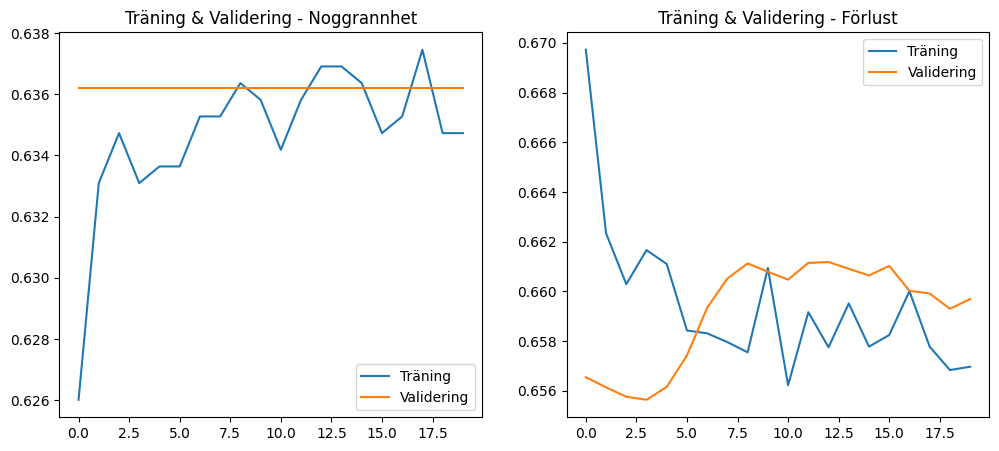

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Definiera datasetets sökvägar
DATASET_PATH = "cnn_data/"  # Struktur: dataset/snowboard/ och dataset/slalom/
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    "cnn_data_split/train/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

val_generator = val_test_datagen.flow_from_directory(
    "cnn_data_split/val/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

test_generator = val_test_datagen.flow_from_directory(
    "cnn_data_split/test/",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)


# Ladda en förtränad EfficientNetB0 utan topp-lager
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Frys basmodellens lager så de inte tränas i första steget
base_model.trainable = False

# Lägg till egna lager ovanpå basmodellen
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling för att minska dimensioner
x = Dense(128, activation="relu")(x)  # Fullt anslutet lager
x = Dropout(0.3)(x)  # Dropout för att undvika överträning
predictions = Dense(1, activation="sigmoid")(x)  # Sigmoid eftersom vi har två klasser

# Skapa den slutliga modellen
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilera modellen
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",  # Använd "categorical_crossentropy" om fler än två klasser
    metrics=["accuracy"]
)

# Träna modellen (första steget)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Träna först i 10 epoker
    verbose=1
)

# Lås upp de sista 20 lagren för vidare träning
base_model.trainable = True
for layer in base_model.layers[:-20]:  
    layer.trainable = False  # Låt tidigare lager förbli låsta

# Kompilera igen med en lägre inlärningshastighet
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lägre LR för finjustering
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Träna modellen vidare
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Ytterligare 20 epoker
    verbose=1
)

loss, acc = model.evaluate(test_generator)
print(f"✅ Modellens testnoggrannhet: {acc:.2%}")

model.save("snowboard_vs_slalom_cnn.h5")
print("✅ Modell sparad som 'snowboard_vs_slalom_cnn.h5'")


def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    
    # Plotta träningens noggrannhet
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Träning")
    plt.plot(epochs_range, val_acc, label="Validering")
    plt.legend(loc="lower right")
    plt.title("Träning & Validering - Noggrannhet")

    # Plotta träningens förlustvärde
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Träning")
    plt.plot(epochs_range, val_loss, label="Validering")
    plt.legend(loc="upper right")
    plt.title("Träning & Validering - Förlust")

    plt.show()

plot_training(history_fine)


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


MODEL_PATH = "snowboard_vs_slalom_cnn.h5"  # Se till att modellen finns i samma mapp
model = load_model(MODEL_PATH)


IMG_SIZE = (224, 224)  # Bildstorlek måste matcha modellen

def preprocess_frame(frame):
    frame = cv2.resize(frame, IMG_SIZE) 
    frame = frame / 255.0  
    frame = np.expand_dims(frame, axis=0) 
    return frame


VIDEO_PATH = "./data/video2.mp4"  
cap = cv2.VideoCapture(VIDEO_PATH)

if not cap.isOpened():
    print("⚠️ Fel: Kunde inte öppna videofilen!")
    exit()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter("output.avi", fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Avsluta om videon är slut

    processed_frame = preprocess_frame(frame)  # Förbered bilden
    prediction = model.predict(processed_frame)[0][0]  # Gör förutsägelse

    # Klassificering: 0 = Slalomåkare, 1 = Snowboardåkare
    label = "Snowboardåkare" if prediction > 0.5 else "Slalomåkare"
    confidence = int(prediction * 100) if prediction > 0.5 else int((1 - prediction) * 100)

  
    text = f"{label} ({confidence}%)"
    color = (0, 255, 0) if label == "Snowboardåkare" else (255, 0, 0)
    
    cv2.putText(frame, text, (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.imshow("Video Klassificering", frame)

    out.write(frame)  # Spara bildrutan i filen


    # Tryck 'q' för att avsluta
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
print("✅ Videoklassificering avslutad!")

from tensorflow.keras.preprocessing import image

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0  # Normalisera
    img_array = np.expand_dims(img_array, axis=0)  # Lägg till batch-dimension
    
    prediction = model.predict(img_array)
    
    if prediction[0][0] > 0.5:
        print(f"🏂 Prediktion: Snowboarder ({prediction[0][0]:.2f})")
    else:
        print(f"⛷ Prediktion: Slalomåkare ({1 - prediction[0][0]:.2f})")

    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Testa på en bild
predict_image(model, "/cnn_data_split/test/snowboarder/2_1.jpg_0.jpg")  # Byt till din testbild


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━

OSError: [Errno 22] Invalid argument: 'C:\\Projects\\VisionComp\\cv-25-project\\cnn_data_split\test\\snowboarder\x02_1.jpg_0.jpg'